# Project 30: Sentiment of Technical Debt Dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

*1. We want to comprehend each categories in terms of wording they do contain. For this purpose, group
comments pertaining to the same category in the same document, perform appropriate filtering and
lemmatization, then plot WordCloud representation of the associated file. Draw a histogram of the
twenty frequent words in each category.*

In [107]:
# Read data and create lists of comments for each class
df = pd.read_csv("technical_debt_dataset/technical_debt_dataset.csv")

defect_df = df[df["classification"]=="DEFECT"]
defect_list = df[df["classification"]=="DEFECT"]["commenttext"].values.tolist()
design_list = df[df["classification"]=="DESIGN"]["commenttext"].values.tolist()
test_list = df[df["classification"]=="TEST"]["commenttext"].values.tolist()
documentation_list = df[df["classification"]=="DOCUMENTATION"]["commenttext"].values.tolist()
implementation_list = df[df["classification"]=="IMPLEMENTATION"]["commenttext"].values.tolist()
other_list = df[df["classification"]=="WITHOUT_CLASSIFICATION"]["commenttext"].values.tolist()

# Preprocessing

# Remove comment tags
for list in [defect_list, design_list, test_list, documentation_list, implementation_list, other_list]:
    for i in range(len(list)):
        list[i] = " ".join(list[i].replace("//", "").replace("/*", "").replace("*/", "").replace("*", "").strip().split())

print("Defects: ", defect_list[:5])
print("Design: ", design_list[:5])
print("Test: ", test_list[:5])
print("Documentation: ", documentation_list[:5])
print("Implementation: ", implementation_list[:5])
print("Other: ", other_list[:5])

Defects:  ['FIXME formatters are not thread-safe', 'XXX: (Jon Skeet) The comment "if it hasn\'t been done already" may not be strictly true. wrapper.maybeConfigure() won\'t configure the same attributes/text more than once, but it may well add the children again, unless I\'ve missed something.', "I hate to admit it, but we don't know what happened here. Throw the Exception.", "Just a note: StarTeam has a status for NEW which implies that there is an item on your local machine that is not in the repository. These are the items that show up as NOT IN VIEW in the Starteam GUI. One would think that we would want to perhaps checkin the NEW items (not in all cases! - Steve Cohen 15 Dec 2001) Unfortunately, the sdk doesn't really work, and we can't actually see anything with a status of NEW. That is why we can just check out everything here without worrying about losing anything.", 'the generated classes must not be added in the generic JAR! is that buggy on old JOnAS (2.4) ??']
Design:  ["XX

In [134]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

#nltk.download('stopwords')

# Stoplist

filtered_tokens = ["``", "''"]

for char in punctuation:
    filtered_tokens.append(char)

stopwords = stopwords.words('english')

stoplist = filtered_tokens + stopwords

# Category lists
defect_words = []
design_words = []
test_words = []
documentation_words =  []
implementation_words =  []
other_words =  []

# Tokenise, filter and lemmatise words

def comment_to_words(list, category_words):
    for comment in list:
        words = nltk.word_tokenize(comment)
        for word in words:
            if word not in stoplist:
                word = WordNetLemmatizer().lemmatize(word)
                category_words.append(word)

comment_to_words(defect_list, defect_words)
comment_to_words(design_list, design_words)
comment_to_words(test_list, test_words)
comment_to_words(documentation_list, documentation_words)
comment_to_words(implementation_list, implementation_words)
comment_to_words(other_list, other_words)

print("Defect words: " + str(defect_words))
print("Design words: " + str(design_words))
print("Test words: " + str(test_words))
print("Documentation words: " + str(documentation_words))
print("Implementation words: " + str(implementation_words))
print("Other words: " + str(other_words))

Defect words: ['FIXME', 'formatters', 'thread-safe', 'XXX', 'Jon', 'Skeet', 'The', 'comment', "n't", 'done', 'already', 'may', 'strictly', 'true', 'wrapper.maybeConfigure', 'wo', "n't", 'configure', 'attributes/text', 'may', 'well', 'add', 'child', 'unless', 'I', "'ve", 'missed', 'something', 'I', 'hate', 'admit', "n't", 'know', 'happened', 'Throw', 'Exception', 'Just', 'note', 'StarTeam', 'status', 'NEW', 'implies', 'item', 'local', 'machine', 'repository', 'These', 'item', 'show', 'NOT', 'IN', 'VIEW', 'Starteam', 'GUI', 'One', 'would', 'think', 'would', 'want', 'perhaps', 'checkin', 'NEW', 'item', 'case', 'Steve', 'Cohen', '15', 'Dec', '2001', 'Unfortunately', 'sdk', "n't", 'really', 'work', 'ca', "n't", 'actually', 'see', 'anything', 'status', 'NEW', 'That', 'check', 'everything', 'without', 'worrying', 'losing', 'anything', 'generated', 'class', 'must', 'added', 'generic', 'JAR', 'buggy', 'old', 'JOnAS', '2.4', 'todo', 'comment', 'still', 'relevant', 'FIXME', 'need', 'use', 'SAXSou

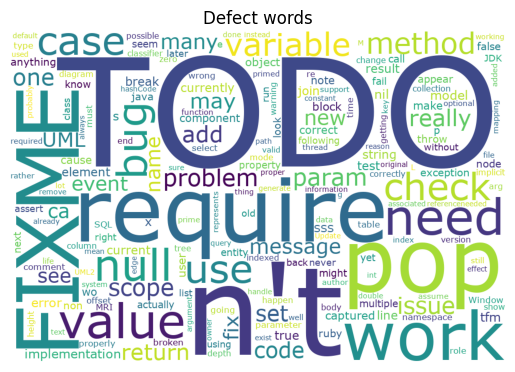

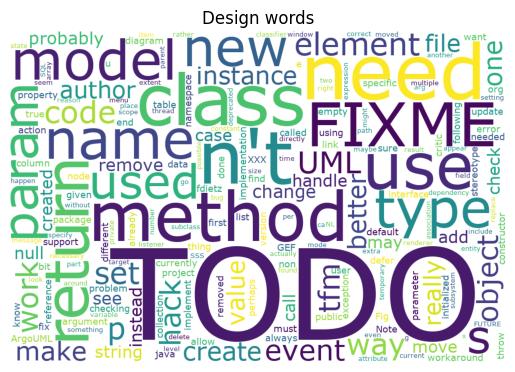

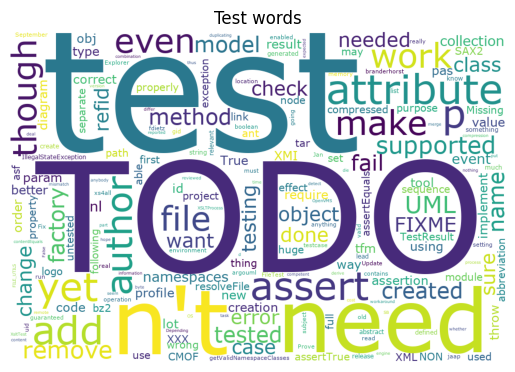

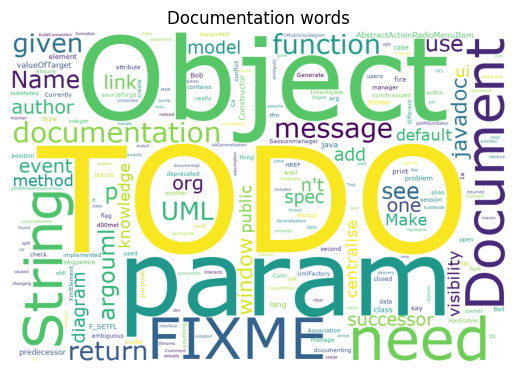

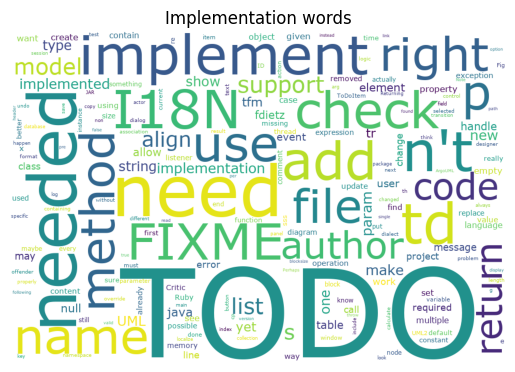

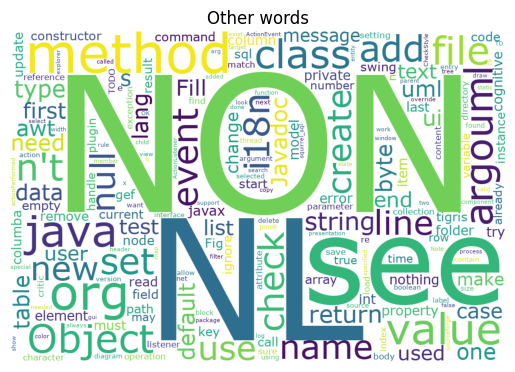

In [135]:
from wordcloud import WordCloud

def wordcloud(title, words):
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf', width=960, height=640, background_color="white",collocations=False, relative_scaling=0.5).generate(words)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

wordcloud("Defect words", " ".join(defect_words))
wordcloud("Design words", " ".join(design_words))
wordcloud("Test words", " ".join(test_words))
wordcloud("Documentation words", " ".join(documentation_words))
wordcloud("Implementation words", " ".join(implementation_words))
wordcloud("Other words", " ".join(other_words))

<Axes: title={'center': 'Design words'}, xlabel='Samples', ylabel='Counts'>

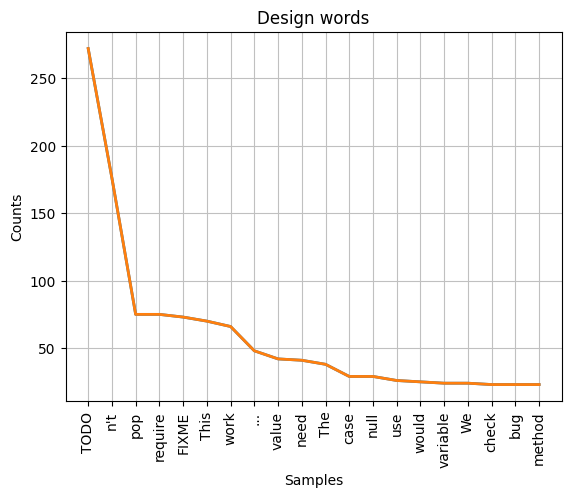

In [146]:
from nltk.probability import FreqDist

FreqDist(defect_words).plot(20, title="Defect words", show=False)
FreqDist(defect_words).plot(20, title="Design words", show=False)

#FreqDist(defect_words).plot(20, title="Test words")
#FreqDist(defect_words).plot(20, title="Documentation words")
#FreqDist(defect_words).plot(20, title="Implementation words")
#FreqDist(defect_words).plot(20, title="Other words")

# Kesken, menee kaikki samaan ja muutenkin pitäiskö histogrammin olla palkkeina